# Kaggle案例泰坦尼克号数据之特征工程

训练和测试数据是一些乘客的个人信息以及存活状况。
这是一个二分类问题。

In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

## 读取数据

In [3]:
train = pd.read_csv("./data/titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


字段有：
PassengerId => 乘客ID
Pclass => 乘客等级(1/2/3等舱位)
Name => 乘客姓名
Sex => 性别
Age => 年龄
SibSp => 堂兄弟/妹个数
Parch => 父母与小孩个数
Ticket => 船票信息
Fare => 票价
Cabin => 客舱
Embarked => 登船港口

In [4]:
#数据集基本信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


训练数据中总共有891名乘客
但是很不幸，我们有些属性的数据不全，
Age（年龄）属性只有714名乘客有记录
Cabin（客舱）只有204名乘客是已知的

测试数据中总共有481名乘客，有更多缺失值
Age（年龄）属性只有332名乘客有记录
Fare属性缺1位乘客的信息
Cabin（客舱）只有91名乘客是已知的

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean字段告诉我们，大概0.383838的人最后获救了

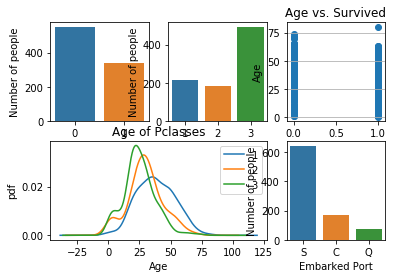

In [6]:
fig = plt.figure()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
#fig_size[0] = fig_size[0]*3
#fig_size[1] = fig_size[1]*3
#plt.rcParams["figure.figsize"] = fig_size


fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
sns.countplot(train.Survived);
plt.xlabel('Survived');
plt.ylabel('Number of people');

plt.subplot2grid((2,3),(0,1))
sns.countplot(train.Pclass);
plt.xlabel('Pclass');
plt.ylabel('Number of people');

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived, train.Age)
plt.ylabel("Age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title("Age vs. Survived")


plt.subplot2grid((2,3),(1,0), colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"pdf") 
plt.title(u"Age of Pclasses")
plt.legend((u'1', u'2',u'3'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
sns.countplot(train.Embarked);
plt.xlabel('Embarked Port');
plt.ylabel('Number of people');

plt.show()


3等舱乘客灰常多；
遇难和获救的人年龄似乎跨度都很广
3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多(财富和年龄的分配？）
登船港口人数按照S、C、Q递减，而且S远多于另外俩港口

1. 不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样
2. 年龄对获救概率也一定是有影响的，副船长说"小孩和女士先走"
3. 和登船港口是不是有关系呢？

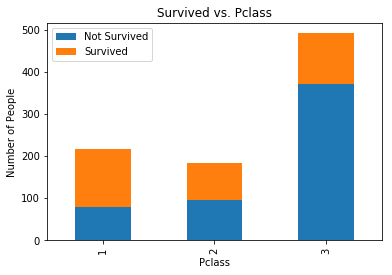

In [7]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not Survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survived vs. Pclass")
plt.xlabel(u"Pclass") 
plt.ylabel(u"Number of People") 

等级为1的乘客，获救的概率高很多

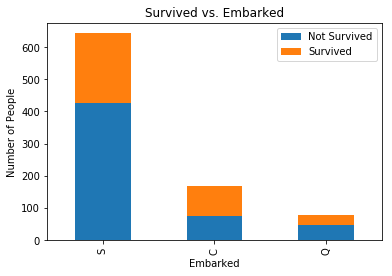

In [8]:
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not Survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survived vs. Embarked")
plt.xlabel(u"Embarked") 
plt.ylabel(u"Number of People") 

plt.show()

好想看不出什么。。。

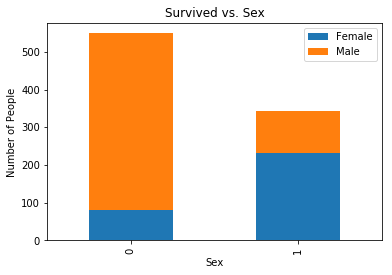

In [9]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'Male':Survived_m, u'Female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"Survived vs. Sex")
plt.xlabel(u"Sex") 
plt.ylabel(u"Number of People")
plt.show()

lady first践行得不错

In [10]:
# 兄弟姐妹
g = train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [11]:
# 家庭成员
g = train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

没看出特别特别明显的规律

## 特征工程开始了

通常遇到缺值的情况，我们会有几种常见的处理方式

1.如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise
2. 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
3. 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
4. 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。<font><br>

本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(话说没有特别多的背景可供我们拟合，不一定是一个多好的选择)

这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据

In [12]:
train.shape

(891, 12)

In [15]:
#ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，不纳入考虑的特征范畴
#cabin只有204个乘客有值，缺失值太多，丢弃
# PassengerId和Name与目标关系似乎不大，丢弃
train = train.drop(["PassengerId","Ticket", "Cabin", "Name"], axis=1)

y = train['Survived']
train = train.drop('Survived', axis = 1)

ValueError: labels ['PassengerId' 'Ticket' 'Cabin' 'Name'] not contained in axis

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [142]:
#其实Age用均值代替就好，这里示范一下如何用回归来拟合

In [18]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges
    
    return df, rfr

train, rfr = set_missing_ages(train)
train

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

有些模型，如Logisstic回归或xgboost，需要输入的特征都是数值型特征，我们通常会先对类别型特征进行one-hot编码。
以Embarked为例，原本一个属性维度，因为其取值可以是[‘S’,’C’,’Q‘]，而将其平展开为’Embarked_C’,’Embarked_S’, ‘Embarked_Q’三个属性
原本Embarked取值为S的，在此处的”Embarked_S”下取值为1，在’Embarked_C’, ‘Embarked_Q’下取值为0
原本Embarked取值为C的，在此处的”Embarked_C”下取值为1，在’Embarked_S’, ‘Embarked_Q’下取值为0
原本Embarked取值为Q的，在此处的”Embarked_Q”下取值为1，在’Embarked_C’, ‘Embarked_S’下取值为0

我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”train”之上

In [19]:
dummies_Embarked = pd.get_dummies(train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train['Pclass'], prefix= 'Pclass')

train = pd.concat([train, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
train.drop(['Pclass', 'Sex',  'Embarked'], axis=1, inplace = True)
train

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
5,23.828953,0,0,8.4583,0,1,0,0,1,0,0,1
6,54.000000,0,0,51.8625,0,0,1,0,1,1,0,0
7,2.000000,3,1,21.0750,0,0,1,0,1,0,0,1
8,27.000000,0,2,11.1333,0,0,1,1,0,0,0,1
9,14.000000,1,0,30.0708,1,0,0,1,0,0,1,0


In [20]:
# 对数值型特征做预处理，标准化
#对类似正则化的Logistic回归模型等很重要，对xgboost等基于树的模型不是必须

In [21]:
from sklearn.preprocessing import StandardScaler

# 分别初始化标准化器
ss_age = StandardScaler()
ss_fare = StandardScaler()

train['Age'] = ss_age.fit_transform(train['Age'].reshape(-1, 1))
train['Fare'] = ss_fare.fit_transform(train['Fare'].reshape(-1, 1))

c:\users\i052090\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
c:\users\i052090\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [22]:
train

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,-0.561363,1,0,-0.502445,0,0,1,0,1,0,0,1
1,0.613182,1,0,0.786845,1,0,0,1,0,1,0,0
2,-0.267727,0,0,-0.488854,0,0,1,1,0,0,0,1
3,0.392955,1,0,0.420730,0,0,1,1,0,1,0,0
4,0.392955,0,0,-0.486337,0,0,1,0,1,0,0,1
5,-0.427102,0,0,-0.478116,0,1,0,0,1,0,0,1
6,1.787727,0,0,0.395814,0,0,1,0,1,1,0,0
7,-2.029545,3,1,-0.224083,0,0,1,0,1,0,0,1
8,-0.194318,0,2,-0.424256,0,0,1,1,0,0,0,1
9,-1.148636,1,0,-0.042956,1,0,0,1,0,0,1,0


In [23]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

X = train.values[:]
# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [24]:
clf.coef_

array([[-0.53339855, -0.3520147 , -0.08508132,  0.09751019,  0.        ,
         0.        , -0.38724088,  2.00924011, -0.63707153,  0.99851873,
         0.        , -1.23618034]])

In [25]:
train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

接下来对训练集和测试集做一样的操作

我们可以通过系数的绝对值看出特征的重要性：
* Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
* Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
* Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权
* 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用，所以也许可以考虑把登船港口这个feature去掉试试)。
* 船票Fare有小幅度的正相关，也许将其离散化，再分至各个乘客等级上？

In [155]:
test= pd.read_csv("./data/titanic_test.csv")

#保存结果用
PassengerId = test["PassengerId"]

test = test.drop(["PassengerId","Ticket", "Cabin", "Name"], axis=1)

test.loc[ (test.Fare.isnull()), 'Fare' ] = 0

# 接着我们对test做和train中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
temp_age = null_age[:, 1:]
predictedAges = rfr.predict(temp_age)
test.loc[ (test.Age.isnull()), 'Age' ] = predictedAges

#对类别型变量编码
dummies_Embarked = pd.get_dummies(test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test['Pclass'], prefix= 'Pclass')

test = pd.concat([test, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)

test.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

#Age 和Fare标准化
test['Age'] = ss_age.transform(test['Age'].reshape(-1, 1))
test['Fare'] = ss_fare.transform(test['Fare'].reshape(-1, 1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [152]:
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':PassengerId, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

### 要判定一下当前模型所处状态(欠拟合or过拟合)

有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。

从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。


对过拟合而言，做一下feature selection，挑出较好的feature的subset来做training

而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度。

我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。举个例子，这里我们一起画一下我们最先得到的baseline model的learning curve。
样本数为横坐标，训练和交叉验证集上的准确率作为纵坐标

estimator : 分类器
title : 表格的标题
X : 输入的feature，numpy类型
y : 输入的target vector
ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
cv : 做cross-validation的时候，数据分成的份数，缺省为3

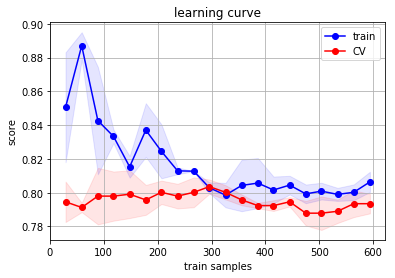

(0.80007829383413176, 0.024621277934465002)

In [153]:
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train samples")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"CV")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"learning curve", X, y)

在实际数据上看，我们得到的learning curve没有理论推导的那么光滑
但是可以大致看出来，训练集和交叉验证集上的得分曲线走势还是符合预期的。

目前的曲线看来，我们的model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。
因此我们可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。

接下来，我们就该看看如何优化baseline系统了
我们还有些特征可以再挖掘挖掘

1. Name可以抽取出Title，对分类也许有用；如男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样
2. 以我们的日常经验，小朋友和老人可能得到的照顾会多一些，这样我们把年龄离散化，按区段分作类别属性会更合适
3. Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试
train['Sex_Pclass'] = train.Sex + "_" + train.Pclass.map(str)
4. 单加一个Child字段，Age<=12的，设为1，其余为0
5. 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
6. 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
7. 把堂兄弟/兄妹 和 Parch删除，增加一个是否有Family字段
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0
8. Sex其实可以只留一维特征：
Sex_map = {'female': 1, 'male': 0}
train['Sex'] = train['Sex'].apply(lambda x: Sex_map[x])
test['Sex'] = test['Sex'].apply(lambda x: Sex_map[x])

还有一种方式是将性别和年龄一起编码为：孩子、老人、男性和女性（老人和小孩是否存和是不考虑性别的）4个哑变量


要做交叉验证监控系统状态
可以用scikit-learn的cross_validation来完成这个工作。。。